In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools
# Write your imports here

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [3]:
income_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [4]:
income_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
data =  """age: continuous.
workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
fnlwgt: continuous.
education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: continuous.
marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
sex: Female, Male.
capital-gain: continuous.
capital-loss: continuous.
hours-per-week: continuous.
native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands."""

In [6]:
ll = []
for d in list(data.split('\n')):
    ll.append(d.split(': ')[0])
ll.append('income')
ll

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'income']

In [7]:
income_data.columns = ll

In [8]:
income_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
nose.tools.assert_is_not_none(income_data)

### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [10]:
def get_num_people_with_high_income(dataframe):
    return dataframe[dataframe.income == ' >50K'].count().age

In [11]:
get_num_people_with_high_income(income_data)

7841

In [12]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

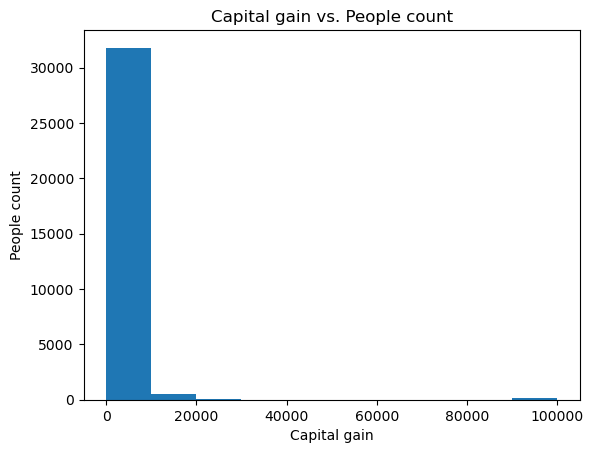

In [13]:
plt.hist(income_data['capital-gain'])
plt.xlabel('Capital gain')
plt.ylabel('People count')
plt.title('Capital gain vs. People count')
plt.show()

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [14]:
def get_num_people_with_higher_gain(dataframe, threshold_gain):
    return income_data[income_data['capital-gain'] >= 60000].count().age

In [15]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

In [16]:
income_data['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [17]:
labels = income_data['marital-status'].value_counts().index
labels = [l.strip() for l in labels]
labels

['Married-civ-spouse',
 'Never-married',
 'Divorced',
 'Separated',
 'Widowed',
 'Married-spouse-absent',
 'Married-AF-spouse']

Create a pie chart of the number of people by marital status.

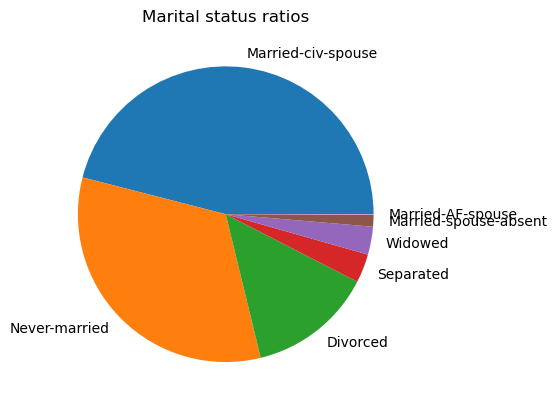

In [18]:
plt.pie(income_data['marital-status'].value_counts(), labels = labels)
plt.title('Marital status ratios')
plt.show()

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [19]:
def most_prominent_marital_status(dataframe):
    status = dataframe['marital-status'].value_counts().index[0].strip()
    num_people = dataframe['marital-status'].value_counts().max()
    return (status, num_people)

In [20]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

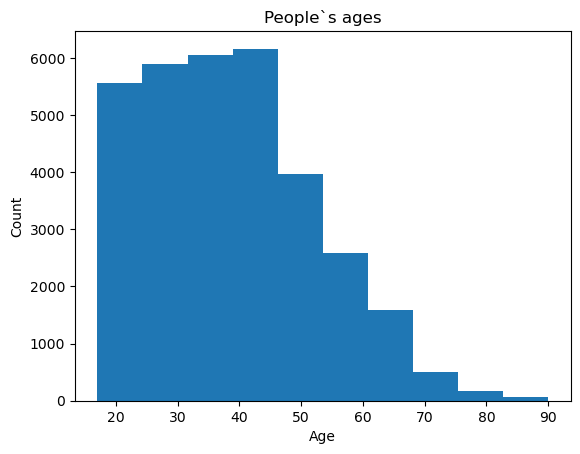

In [21]:
plt.hist(income_data.age)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('People`s ages')
plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [22]:
def get_num_people_by_age_category(dataframe):
    young = len(dataframe[dataframe['age'] <= 30])
    middle_aged = len(dataframe[(dataframe['age'] > 30) & (dataframe['age'] <= 60)])
    old = len(dataframe[dataframe['age'] > 60])
    return young, middle_aged, old

In [23]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

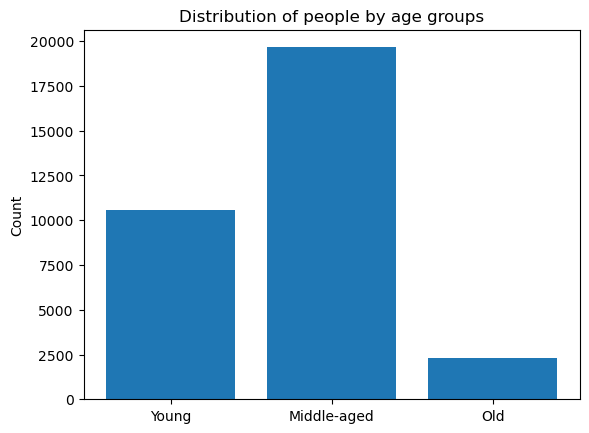

In [24]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [25]:
def get_second_highest_num_people(dataframe):
    num_people = dataframe['native-country'].value_counts()[1]
    country = dataframe['native-country'].value_counts().index[1]
    return num_people, country

In [26]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [27]:
def get_mean_working_hours_by_occupation(dataframe):
    dataframe.occupation = dataframe.occupation.str.strip()
    dataframe = dataframe.drop(dataframe[dataframe['occupation'] == '?'].index)
    mean_values = dataframe.groupby('occupation')['hours-per-week'].mean()
    return mean_values

In [28]:
hours = get_mean_working_hours_by_occupation(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occupation
Adm-clerical         37.558355
Armed-Forces         40.666667
Craft-repair         42.304221
Exec-managerial      44.987703
Farming-fishing      46.989940
Handlers-cleaners    37.947445
Machine-op-inspct    40.755744
Other-service        34.701669
Priv-house-serv      32.885906
Prof-specialty       42.386715
Protective-serv      42.870570
Sales                40.781096
Tech-support         39.432112
Transport-moving     44.656230
Name: hours-per-week, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

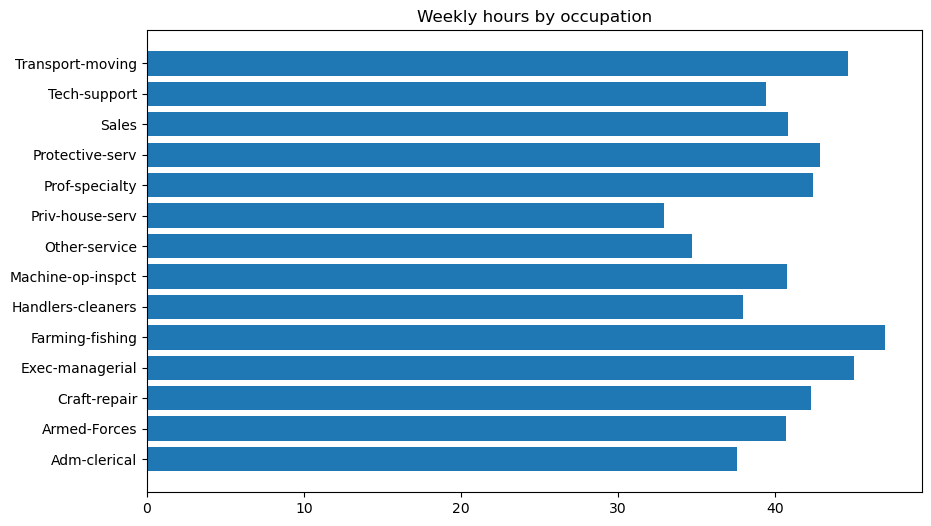

In [29]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()

# Task from test

In [31]:
p_plants = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/boot/nuclear.csv')

In [32]:
p_plants

,Unnamed: 0,cost,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
0,1,460.05,68.58,14,46,687,0,1,0,0,14,0
1,2,452.99,67.33,10,73,1065,0,0,1,0,1,0
2,3,443.22,67.33,10,85,1065,1,0,1,0,1,0
3,4,652.32,68.00,11,67,1065,0,1,1,0,12,0
4,5,642.23,68.00,11,78,1065,1,1,1,0,12,0
5,6,345.39,67.92,13,51,514,0,1,1,0,3,0
6,7,272.37,68.17,12,50,822,0,0,0,0,5,0
7,8,317.21,68.42,14,59,457,0,0,0,0,1,0
8,9,457.12,68.42,15,55,822,1,0,0,0,5,0
9,10,690.19,68.33,12,71,792,0,1,1,1,2,0


In [35]:
p_plants.shape

(32, 12)

In [38]:
round(p_plants.cost.mean(), 2)

461.56

In [40]:
p_plants.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,32.0,16.500000,9.380832,1.00,8.7500,16.500,24.2500,32.00
cost,32.0,461.560312,170.120670,207.51,310.3225,448.105,611.9625,881.24
date,32.0,68.581250,1.015267,67.17,67.8975,68.420,68.9200,71.08
t1,32.0,13.750000,3.369694,7.00,11.7500,13.000,15.2500,22.00
t2,32.0,62.375000,10.394633,44.00,56.5000,62.500,70.2500,85.00
cap,32.0,825.375000,189.359148,457.00,745.0000,822.000,947.2500,1130.00
pr,32.0,0.312500,0.470929,0.00,0.0000,0.000,1.0000,1.00
ne,32.0,0.250000,0.439941,0.00,0.0000,0.000,0.2500,1.00
ct,32.0,0.406250,0.498991,0.00,0.0000,0.000,1.0000,1.00
bw,32.0,0.187500,0.396558,0.00,0.0000,0.000,0.0000,1.00


In [45]:
p_plants['ne'].value_counts()

0    24
1     8
Name: ne, dtype: int64

In [59]:
mpp = p_plants[['pr', 'cap']]
mpp

,pr,cap
0,0,687
1,0,1065
2,1,1065
3,0,1065
4,1,1065
5,0,514
6,0,822
7,0,457
8,1,822
9,0,792


In [65]:
mpp = mpp[mpp.pr == 1]
mpp.cap.max()

1065

In [50]:
p_plants[p_plants.pr == 1]

,Unnamed: 0,cost,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
2,3,443.22,67.33,10,85,1065,1,0,1,0,1,0
4,5,642.23,68.00,11,78,1065,1,1,1,0,12,0
8,9,457.12,68.42,15,55,822,1,0,0,0,5,0
17,18,289.66,68.42,15,76,530,1,0,1,0,2,0
19,20,490.88,68.92,16,59,1050,1,0,0,0,8,0
21,22,665.99,70.92,22,57,828,1,1,0,0,20,0
23,24,608.80,70.08,19,58,821,1,0,0,0,3,0
29,30,280.36,67.83,12,71,886,1,0,0,1,11,1
30,31,217.38,67.25,13,72,745,1,0,0,0,8,1
31,32,270.71,67.83,7,80,886,1,0,0,1,11,1


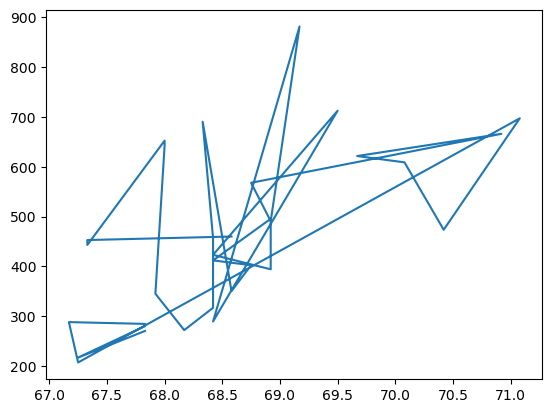

In [46]:
plt.plot(p_plants.date, p_plants.cost)